<a href="https://colab.research.google.com/github/SergeyS1954/CLT/blob/main/LW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 2
## Основные характеристики невосстанавливаемых элементов

## Вероятность безотказной работы для невосстанавливаемых элементов

Вероятность безотказной работы для невосстанавливаемых элементов $\mathbb{P}(t)$ --- это вероятность того, что на полуинтервале $(0,t]$ отказ системы не возникает, то есть случайная величина $\xi$, равная значению времени до отказа системы, имеет значение большее $t$.

Обозначим функцию распределения вероятностей случайной величины $\xi$ через $F_{fail}(t)$, а соответствующую плотность вероятности через $f_{fail}(t)$. Тогда    
$$
		\mathbb{P}_{nofail}(t) = \mathbb{P}(\xi > t) = 1 - F_{fail}(t) = 1 - \int_{0}^{t}f_{fail}(u)du.
$$

Непосредственно из определения следует интуитивно очевидное свойство вероятностей указанных случайных величин: с ростом времени $t$ вероятность безотказной работы системы на полуинтервале $(0,t]$ убывает до $0$, а вероятность отказа системы на полуинтервале  возрастает до $1$.  


Математическое ожидание времени безотказной работы системы
	$$
	\mathbb{M}_{nofail} = \bar{t}_{nofail} = \int_{0}^{\infty}t f(t)dt = \int_{0}^{\infty}tdF(t) = \int_{0}^{\infty}d\mathbb{P}_{nofail}.
	$$

Из последнего соотношения следует, что математическое ожидание времени безотказной работы есть интеграл (то есть площадь под кривой) от вероятности безотказной работы при бесконечном увеличении времени.



Интенсивность отказов $\lambda(t)$ ГОСТ 27.002 определяет
как условную плотность вероятности возникновения отказа невосстанавливаемого элемента, при условии, что до момента времени $t$ отказа не произошло.

Вероятность безотказной работы системы на полуинтервале $(t,t + \Delta t]$ при условии. что до момента $t$ система работала безотказно есть:

$$
	\mathbb{P}_{nofail}(\xi > t + \Delta t | \xi > t) =\mathbb{P}_{nofail}(A | B) = \frac{\mathbb{P}_{nofail}(A  B)}{\mathbb{P}_{nofai}(B)}  
	= \frac{\int_{t + \Delta t}^{\infty}f(t)dt}{\int_{t}^{\infty}f(t)dt}.
$$
Вычисляем:
$$		\lambda(t) = \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t) - \mathbb{P}(t + \Delta t)}{\mathbb{P}(t) \Delta t} = \\
		= - \frac{1}{\mathbb{P}(t)}  \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t + \Delta t) - \mathbb{P}(t)} {\Delta t} =  
		\\
		= - \frac{1}{\mathbb{P}(t)} \frac{d}{d t}\mathbb{P}(t)  = - \frac{d}{d t}\left[\ln \mathbb{P}(t)]\right.
$$
Потенциируя, получаем:
$$
	\mathbb{P}_{nofail}(t) = \exp \left(- \int_{0}^{t}\lambda(u)du\right).
$$


Представленное уравнение для $\mathbb{P}_{nofail}(t)$ связывает вероятность безотказной работы невосстанавливаемого элемента с интенсивностью отказов.

Рассмотрим пример для  случая постоянной интенсивности отказов $\lambda = const$.

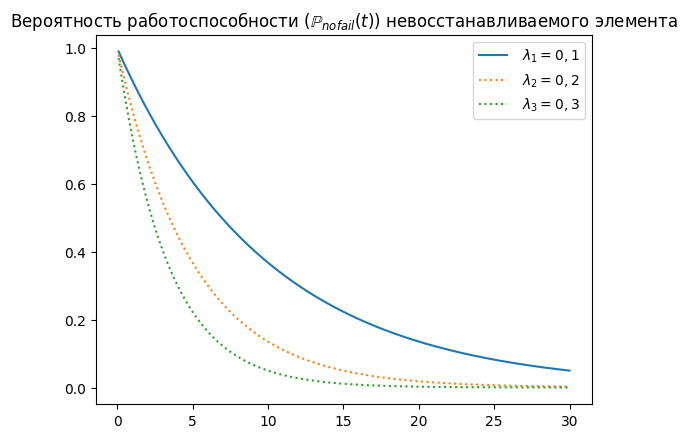

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 0.1
x = np.arange (0.1, 30.0, 0.01)
y1 = np.exp(-lam*x)
y2 = np.exp(-2*lam*x)
y3 = np.exp(-3*lam*x)
plt.plot(x,y1, label = r" $\lambda_1 = 0,1$")
plt.plot(x,y2, linestyle = ':', label = r" $\lambda_2 = 0,2$")
plt.plot(x,y3, linestyle = ':', label = r" $\lambda_3 = 0,3$")
plt.legend()
plt.title('Вероятность работоспособности ($\mathbb{P}_{nofail}(t)$) невосстанавливаемого элемента')
plt.show()

Рассмотрим пример для  случая возрастающей интенсивности отказов $\lambda(t) = \lambda_0 + \alpha t$.

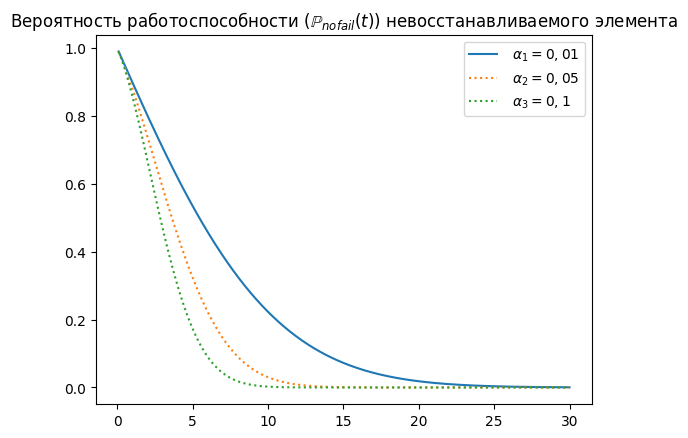

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
lam_0 = 0.1
alpha= 0.01
def target_function_f(x):
 return lam_0 + alpha*x


x_min = 0.1
x_max = 30.0
x = np.arange (x_min, x_max, 0.01)
y1 =[]
y2 =[]
y3 =[]
for xx in x:
    alpha= 0.01
    intf = integrate.quad(target_function_f, 0, xx)
    y1.append(np.exp(-intf[0]))
    alpha= 0.05
    intf = integrate.quad(target_function_f, 0, xx)
    y2.append(np.exp(-intf[0]))
    alpha= 0.1
    intf = integrate.quad(target_function_f, 0, xx)
    y3.append(np.exp(-intf[0]))

plt.plot(x,y1, label = r" $\alpha_1 = 0,01$")
plt.plot(x,y2, linestyle = ':', label = r" $\alpha_2 = 0,05$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha_3 = 0,1$")
plt.legend()
plt.title('Вероятность работоспособности ($\mathbb{P}_{nofail}(t)$) невосстанавливаемого элемента')
plt.show()

# Основные характеристики надежности невосстанавливаемых элементов

Для анализа надежности невосстанавливаемых элементов используются
следующие основные характеристики:

$\lambda(t)$ --- интенсивность потока отказов;

$ \mathbb{M}_{nofail},\bar{T}$ --- средняя наработка на отказ, (среднее время работы элемента до отказа);

$\mathbb{P}_{nofail}(t)$ --- вероятность безотказной работы в течение времени $t$.

Иногда в приложениях используется также такая характеристика как частота отказов, которая задается как
$$
	\varphi(t) = \lambda(t) \mathbb{P}_{nofail}(t).
$$
Формально, частота отказов --- это плотность распределения времени безотказной работы элемена.

# Случайный поток событий
Обозначим через  $X(t)$ --- случайный процесс с непрерывным временем и
дискретным множеством состояний, описывающий число отказов системы, произошедших на полуинтервале $(0,t]$.

Формально задать случайный процесс $X(t)$ означает
для произвольных $t_1 \leq t_2 \leq \ldots \leq t_n $ и для произвольных $k_1 \leq k_2 \leq \ldots \leq k_n $ задать вероятности
\begin{equation}
P(X(t_1)) = k_1, P(X(t_2) = k_2),   \ldots , P(X(t_n) = k_n).
\end{equation}

Случайный процесс с  непрерывным временем и дискретным множеством состояний также называют \textit{случайным потоком событий}, или просто  --- \textit{случайным потоком}.


## Стационарность
Поток случайных событий называется *стационарным*, если для любого натурального $n$, действительного числа $\alpha > 0$ и произвольных моментов времени $0 < t_1 < t_2 < \cdots < t_n $ совместное распределение случайных величин
\begin{equation}
X(t_1 + \alpha ) - X(\alpha ), X(t_2 + \alpha ) - X(\alpha ), \ldots , X(t_n + \alpha ) - X(\alpha )
\end{equation}
не зависит от  $\alpha $ для всех $k = 1,2, \ldots, n$ и $t > 0$.

На содержательном уровне свойство стационарности означает, что вероятность поступления определенного числа требований на полуинтервале $[\alpha,\alpha + t)$ не зависит от точки начала отсчета ($\alpha$), а зависит только от
длины полуинтервала $t$.


## Отсутствие последействия
Поток случайных событий называется *потоком с отсутствием последействия*, если для любых моментов времени  $t_0 <  \ldots < t_n $ случайные величины $$X(t_0), X(t_1) - X(t_0), X(t_2) - X(t_1),  \ldots , X(t_n) - X(t_{n-1})$$ независимы
в совокупности.

На содержательном уровне свойство отсутствия последействия означает, что число требований, поступивших на полуинтервале  $[t,t + \alpha)$, не зависит от того, сколько требований поступило
в систему до момента времени $t$.


## Ординарность
Обозначим число событий потока, появившихся на полуинтервале $[0,t) $ через $\lambda(t)$.  
Стационарный поток называется *ординарным*, если для любого полуинтервала $[0,t)\   P (\lambda(t) > 1 ) = o(t) $.

На содержательном уровне свойство ординарности означает, что вероятность появления на малом полуинтервале более одного требования пренебрежимо мала.


## Простейший поток
**Простейшим потоком** называется поток, обладающий свойствами стационарности, отсутствием последействия и ординарности.

Доказано, что число требований $n$, появившихся в простейшем потоке за время $ [0, t)$, распределено по закону Пуассона с параметром $\lambda t$.
   
Обозначим $P_{k}(t) = P(X(t) = k)$. Тогда

$$
P_{k}(t) = \frac{(\lambda t)^k}{k !} e^{-\lambda t}, \ k = 1,2, \ldots.
$$  

Примеры распределения числа событий на полуинтервале единичной длины для простейшего потока.

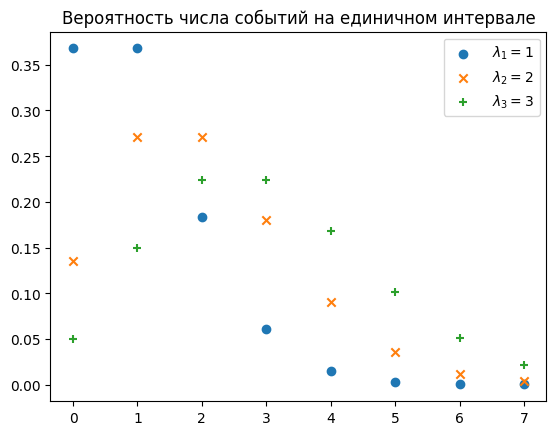

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 1.0
x = np.arange (0, 8, 1)
y1 = stats.poisson.pmf(x, lam)
y2 = stats.poisson.pmf(x, 2.0*lam)
y3 = stats.poisson.pmf(x, 3.0*lam)
plt.scatter(x,y1, label = r" $\lambda_1 = 1$")
plt.scatter(x,y2, marker='x', label = r" $\lambda_2 = 2$")
plt.scatter(x,y3, marker='+', label = r" $\lambda_3 = 3$")
plt.legend()
plt.title('Вероятность числа событий на единичном интервале')
plt.show()

## Структурная надежность системы

Одним из методов расчета надежности сложных систем является *метод структурных схем*.

Центральная идея метода --- разработка такой модели системы, в которой она представлена как совокупность фрагментов, объединенных в подсистемы с параллельным и последовательным соединением  элементов.

В результате декомпозиции исходной системы должна быть получена структурная схема, по сути являющаяся моделью,  предназначенной для расчета характеристик надежности  системы.
### Система последовательно соединенных элементов
Назовем систему *системой последовательно соединенных элементов*  $c_1, c_2,\dots c_n$ если она работоспособна тогда и только тогда, когда работоспособен *каждый* элемент системы.

Систему последовательно соединенных элементов также можно определить через понятие отказа:  система  называется системой последовательно соединенных элементов, если отказ любого элемента приводит к отказу всей системы.

Вероятность работоспособности системы   задается формулой:

$$  
\mathbb{P}= \mathbb{P}(\varphi(\textbf{X} = 1))  = \prod_{i=1}^{n}\mathbb{P}(x_i = 1) = \prod_{i=1}^{n}p_i.
$$

### Система параллельно  соединенных элементов

Назовем систему *системой  параллельно соединенных элементов*, если она работоспособна тогда и только тогда, когда работоспособен *по крайней мере один* из элементов системы.

Вероятность работоспособности системы  с параллельным подключением элементов  задается формулой:

$$  
\mathbb{P}= \mathbb{P}(\exists X\varphi(\textbf{X} = 1))  = 1 - \prod_{i=1}^{n}\mathbb{P}(x_i = 0) = 1 - \prod_{i=1}^{n}(1 -p_i).
$$
Если все элементы имеют экспоненциальное распределение времени наработки до отказа, то вероятность работоспособности системы  есть:

$$  
\mathbb{P}(t) = 1 - \prod_{i=1}^{n}(1 - e^{-\lambda_i t}).
$$

Интегрируя на положительной полуоси, получаем среднюю наработку системы до отказа

$$  
\mathbb{T} = \sum_{i=1}^{n} \frac{1}{\lambda_i} - \sum_{i<j} \frac{1}{\lambda_i + \lambda_j} + \dots + (-1)^n \frac{1}{\lambda_1 + \dots + \lambda_n}.
$$

Если интенсивности отказов элементов системы равны ${\lambda}$, то получаем более простой вид зависимости
$$  
\mathbb{T} = \left( 1 + \frac{1}{2} + \dots + \frac{1}{n} \right)\frac{1}{\lambda} .
$$

Представленная формула показывает, что эффект от увеличения  параллельно работающих элементов не пропорционален их числу.


Приведем пример, иллюстрирующий изменение надежности системы параллельно соединенных элементов, от их числа.

В качестве иллюстрации, на  рассмотрим график увеличения среднего времени наработки на отказ для системы, состоящей из набора параллельно соединенных элементов.

В данном примере  среднее время наработки на отказ  элемента системы положено равным  $1/\lambda = 100$.

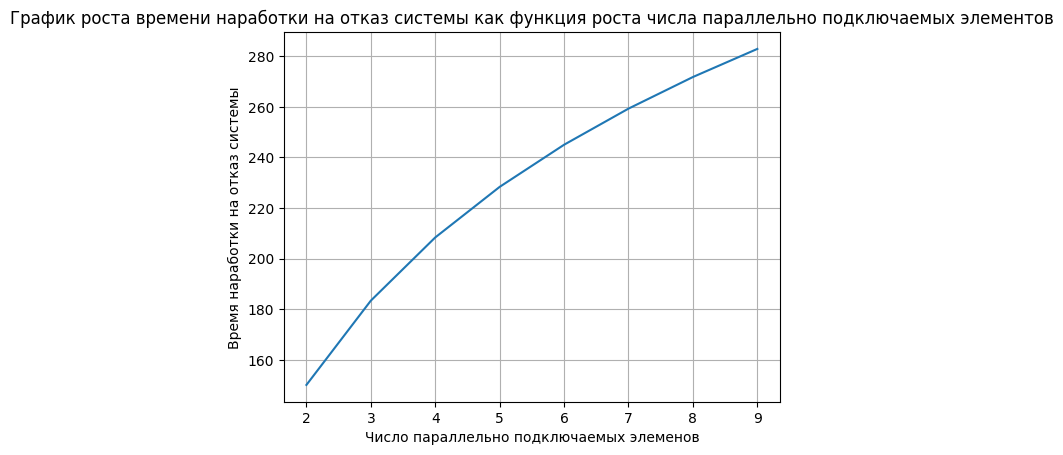

In [8]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
TT = []
k = 1
n = np.arange (2., 10.,1.)
for nn in n:
    k = k + 1/nn
    TT.append(T*k)

plt.plot (n,TT)
plt.title('График роста времени наработки на отказ системы как функция роста числа параллельно подключаемых элементов')
plt.xlabel('Число параллельно подключаемых элеменов')
plt.ylabel('Время наработки на отказ системы')
plt.grid(True)
plt.show()


График наглядно демонстрирует, что система из четырех параллельно соединенных элементов приводит в чуть более чем духкратному увеличению среднего времени наработки на отказ.

А девять(!) параллельно подключенных элементов не приводят даже к трехкратному увеличению среднего времени наработки на отказ системы.